In [3]:
import lightgbm
import pandas as pd
import os

In [188]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from C:\Users\gurvinder1.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\GURVIN~1.SIN\AppData\Local\Temp\tmpclmncfi_
  JVM stdout: C:\Users\GURVIN~1.SIN\AppData\Local\Temp\tmpclmncfi_\h2o_gurvinder1_singh_started_from_python.out
  JVM stderr: C:\Users\GURVIN~1.SIN\AppData\Local\Temp\tmpclmncfi_\h2o_gurvinder1_singh_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_gurvinder1_singh_dhhwmv
H2O cluster total nodes:,1
H2O cluster free memory:,3.523 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [189]:
df = h2o.import_file(r'data-Q1/train_data.csv')
df.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%


Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist,Avg_damage
264.22,19.06,96.79,6332,1788.88
366.66,24.42,96.67,6603.7,1750.92
259.54,16.37,97.5,6145.8,1838.12
183.23,13.52,97.31,6584.7,1869.24
299.71,19.74,97.82,6701.55,1818.88
396.3,14.88,96.15,4000.7,1746.08
250.44,13.61,97.43,4458.6,1863.52
161.39,12.53,97.3,8117.05,1904.76
170.88,12.94,97.19,6687.3,1851.44
206.76,12.5,97.45,6300.65,1821.56


In [192]:
y = "Avg_damage"
x = ['Avg_firing_dist','Avg_Srv_time','Avg_ping','Total_travel_dist']

In [193]:
aml = H2OAutoML(max_models = 30, max_runtime_secs=300, seed = 1)
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [194]:
lb = aml.leaderboard
lb.head()
lb.head(rows=lb.nrows) # Entire leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190412_145805,242.958,15.5871,242.958,11.7736,0.00856864
GBM_grid_1_AutoML_20190412_145805_model_8,246.178,15.6901,246.178,11.6835,0.00863971
GBM_grid_1_AutoML_20190412_145805_model_9,247.004,15.7164,247.004,11.8009,0.00864973
StackedEnsemble_BestOfFamily_AutoML_20190412_145805,247.077,15.7187,247.077,11.9609,0.00863552
GBM_1_AutoML_20190412_145805,248.339,15.7588,248.339,11.926,0.00866185
GBM_2_AutoML_20190412_145805,249.313,15.7896,249.313,11.9083,0.00868514
GBM_3_AutoML_20190412_145805,249.991,15.8111,249.991,11.9316,0.00870204
GBM_4_AutoML_20190412_145805,251.207,15.8495,251.207,11.887,0.00872269
XRT_1_AutoML_20190412_145805,277.676,16.6636,277.676,12.5204,0.00915231
GBM_5_AutoML_20190412_145805,285.427,16.8946,285.427,13.0277,0.0092625


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20190412_145805,242.958,15.5871,242.958,11.7736,0.00856864
GBM_grid_1_AutoML_20190412_145805_model_8,246.178,15.6901,246.178,11.6835,0.00863971
GBM_grid_1_AutoML_20190412_145805_model_9,247.004,15.7164,247.004,11.8009,0.00864973
StackedEnsemble_BestOfFamily_AutoML_20190412_145805,247.077,15.7187,247.077,11.9609,0.00863552
GBM_1_AutoML_20190412_145805,248.339,15.7588,248.339,11.926,0.00866185
GBM_2_AutoML_20190412_145805,249.313,15.7896,249.313,11.9083,0.00868514
GBM_3_AutoML_20190412_145805,249.991,15.8111,249.991,11.9316,0.00870204
GBM_4_AutoML_20190412_145805,251.207,15.8495,251.207,11.887,0.00872269
XRT_1_AutoML_20190412_145805,277.676,16.6636,277.676,12.5204,0.00915231
GBM_5_AutoML_20190412_145805,285.427,16.8946,285.427,13.0277,0.0092625


In [196]:
preds = aml.predict(h2o.import_file(r'data-Q1/test_data.csv'))

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [203]:
preds.as_data_frame()['predict'].values

array([1763.67111558, 1847.98253521, 1787.59691085, 1884.45794169,
       1829.59460194, 1763.46701755, 1739.57659265, 1936.44174449,
       1727.23986198, 1774.23176004, 1784.28867269, 1889.2157643 ,
       1878.90752611, 1743.34426287, 1757.98896377, 1733.34533169,
       1786.73049735, 1834.88251752, 1782.35054362, 1876.34407448,
       1814.01989185, 1944.55688478, 1757.4928473 , 1777.84171824,
       1724.90705238, 1841.70157915, 1900.31476799, 1899.80010804,
       1775.12453656, 1809.0977212 , 1875.16248063, 1852.11371476,
       1932.1143828 , 1843.23605843, 1927.13677075, 1858.07835658,
       1944.20316931, 1836.71154155, 1859.12492442, 1773.08433861,
       1731.64703956, 1804.21823448, 1884.79656503, 1729.32073663,
       1893.23288498, 1742.9673671 , 1779.3797258 , 1741.17852736,
       1801.58176958, 1917.70500735, 1930.60593233, 1808.10459932,
       1898.97026557, 1905.73820815, 1732.20688586, 1923.82658843,
       1815.70303184, 1778.32333723, 1901.76649245, 1819.68389

In [1]:
%%time
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import xgboost as xgb

from sklearn import preprocessing
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from math import sqrt
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from rgf.sklearn import RGFRegressor,RGFClassifier

Wall time: 7.58 s


In [2]:
from IPython.core.interactiveshell import InteractiveShell
from tqdm import tqdm_notebook
InteractiveShell.ast_node_interactivity = "all"

In [3]:
os.listdir('data-Q1')

['README.txt', 'sample_submission.csv', 'test_data.csv', 'train_data.csv']

In [4]:
print(os.listdir("data-Q1"))
train = pd.read_csv(r'data-Q1/train_data.csv')
test = pd.read_csv(r'data-Q1/test_data.csv')
sub = pd.read_csv(r'data-Q1/sample_submission.csv')

['README.txt', 'sample_submission.csv', 'test_data.csv', 'train_data.csv']


In [7]:
train.head()
sub.head()
train.shape

,Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist,Avg_damage
0,264.22,19.06,96.79,6332.00,1788.88
1,366.66,24.42,96.67,6603.70,1750.92
2,259.54,16.37,97.50,6145.80,1838.12
3,183.23,13.52,97.31,6584.70,1869.24
4,299.71,19.74,97.82,6701.55,1818.88


,150
0,1500
1,2000
2,1800
3,1350


(2000, 5)

In [21]:
train[train['Avg_damage']>1970]
train[train['Avg_damage']<1710]

,Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist,Avg_damage
16,90.54,12.70,97.74,6756.65,1984.36
292,67.01,12.30,96.94,6558.10,1984.64
447,74.81,12.52,97.07,6045.10,1981.84
545,71.95,12.52,97.02,6019.45,1986.40
600,64.28,12.58,96.92,7627.80,1980.48
1028,85.21,12.30,97.05,8870.40,1971.16
1330,87.94,12.52,97.59,5724.00,1976.84
1350,76.24,12.52,97.69,6238.90,1988.04
1482,76.63,12.81,97.93,8032.50,1972.36
1694,120.05,12.63,98.24,7644.90,1972.24


,Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist,Avg_damage
434,410.08,19.99,96.06,4265.75,1708.28
525,379.27,21.74,96.26,6265.50,1707.56
1112,398.38,22.27,96.55,6228.45,1707.84
1212,395.39,20.87,96.47,5002.95,1709.52
1328,373.81,21.24,96.86,6838.35,1706.16
1507,411.51,21.24,96.77,5420.95,1706.92
1653,413.20,20.46,96.23,5489.35,1708.64
1746,413.46,21.24,96.76,5435.20,1708.92


In [6]:
train.nunique()

Avg_firing_dist      1399
Avg_Srv_time          460
Avg_ping              270
Total_travel_dist    1666
Avg_damage           1685
dtype: int64

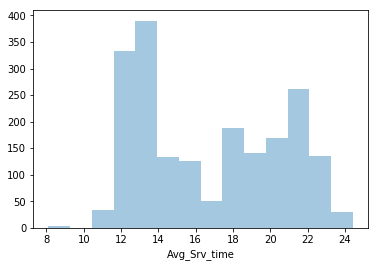

In [17]:
sns.distplot(train['Avg_Srv_time'],kde = False)

In [22]:
train['srv_fire_comb'] = train['Avg_Srv_time'] * train['Avg_firing_dist']

test['srv_fire_comb'] = test['Avg_Srv_time'] * test['Avg_firing_dist']

In [130]:
train['ratio'] = train['Total_travel_dist']/train['Avg_Srv_time']
test['ratio'] = test['Total_travel_dist']/test['Avg_Srv_time']

In [87]:
train.corr()

,Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist,Avg_damage
Avg_firing_dist,1.000000,0.848076,-0.532552,-0.530093,-0.950700
Avg_Srv_time,0.848076,1.000000,-0.426458,-0.312642,-0.867387
Avg_ping,-0.532552,-0.426458,1.000000,0.116659,0.541618
Total_travel_dist,-0.530093,-0.312642,0.116659,1.000000,0.380421
Avg_damage,-0.950700,-0.867387,0.541618,0.380421,1.000000


In [183]:
bins = [7, 10, 12, 14.4, 16,18,20,22,25]
# train['binned'] = pd.cut(train['Avg_Srv_time'], bins).value_counts()

train['binned'] = pd.cut(train['Avg_Srv_time'], bins=bins, labels=list(labels))

In [182]:
labels = train.groupby(pd.cut(train['Avg_Srv_time'], bins=bins)).size().values

In [184]:
bins = [7, 10, 12, 14.4, 16,18,20,22,25]
# train['binned'] = pd.cut(train['Avg_Srv_time'], bins).value_counts()
labels = test.groupby(pd.cut(test['Avg_Srv_time'], bins=bins)).size().values

test['binned'] = pd.cut(test['Avg_Srv_time'], bins=bins, labels=list(labels))

In [120]:
list(labels)

[0, 8, 73, 18, 18, 28, 30, 25]

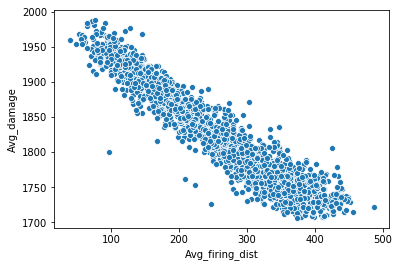

In [15]:
import seaborn as sns
ax = sns.scatterplot(x="Avg_firing_dist", y="Avg_damage", data=train)

In [12]:
test.head()

,Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist
0,343.13,18.94,96.78,7130.95
1,246.80,13.57,97.17,4865.20
2,290.48,15.08,96.35,7250.65
3,175.04,13.20,97.42,7958.40
4,233.93,17.46,97.68,7823.50


In [13]:
train.shape
test.shape

(2000, 5)

(200, 4)

In [16]:
# Number of NaNs in each column
train.isnull().sum(axis=0)

Avg_firing_dist      0
Avg_Srv_time         0
Avg_ping             0
Total_travel_dist    0
Avg_damage           0
dtype: int64

In [23]:
Y1=train['Avg_damage']
train1=train.drop(['Avg_damage'],axis=1)
train1=train1
Y=Y1.values

test1=test

In [227]:
#make 2 way interaction between all the columns
def Make_2way(X, Xt):
    columns_length=X.shape[1]
    for j in range (0,columns_length):
        for d in range (j+1,columns_length):  
            print(("Adding columns' interraction %d and %d" % (j, d) ))
            new_column_train=X[:,j]*X[:,d]
            new_column_test=Xt[:,j]*Xt[:,d]    
            X=np.column_stack((X,new_column_train))
            Xt=np.column_stack((Xt,new_column_test))
    return X, Xt

In [228]:
train3,test3= Make_2way(train2, test2)

Adding columns' interraction 0 and 1
Adding columns' interraction 0 and 2
Adding columns' interraction 0 and 3
Adding columns' interraction 0 and 4
Adding columns' interraction 0 and 5
Adding columns' interraction 0 and 6
Adding columns' interraction 0 and 7
Adding columns' interraction 0 and 8
Adding columns' interraction 0 and 9
Adding columns' interraction 1 and 2
Adding columns' interraction 1 and 3
Adding columns' interraction 1 and 4
Adding columns' interraction 1 and 5
Adding columns' interraction 1 and 6
Adding columns' interraction 1 and 7
Adding columns' interraction 1 and 8
Adding columns' interraction 1 and 9
Adding columns' interraction 2 and 3
Adding columns' interraction 2 and 4
Adding columns' interraction 2 and 5
Adding columns' interraction 2 and 6
Adding columns' interraction 2 and 7
Adding columns' interraction 2 and 8
Adding columns' interraction 2 and 9
Adding columns' interraction 3 and 4
Adding columns' interraction 3 and 5
Adding columns' interraction 3 and 6
A

In [23]:
# #create the cross validation fold for different boosting and linear model.
# from sklearn.model_selection  import StratifiedKFold
# from sklearn import ensemble
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# SEED=42
# st_train = train1.values
# st_test = test1.values
# clf1 = lgb.LGBMRegressor()
# clf2 = lgb.LGBMRegressor(max_depth= 8, learning_rate=0.0941, n_estimators=197, num_leaves= 17, reg_alpha=3.4492 , reg_lambda= 0.0422) #lgb_pca
# clf = ensemble.VotingClassifier(estimators = [('clf1', clf1),('clf2', clf2)],
#                                        voting = 'soft', weights = [3,3])

# fold = 3
# cv = StratifiedKFold(n_splits=15, shuffle=False, random_state=2319)
# X_preds = np.zeros(st_train.shape[0])
# preds = np.zeros(st_test.shape[0])
# for i, (tr, ts) in enumerate(cv.split(st_train, Y)):
#     print(ts.shape)
#     mod = clf.fit(st_train[tr], Y[tr])
#     X_preds[ts] = mod.predict_proba(st_train[ts])[:,1]
#     preds += mod.predict_proba(st_test)[:,1]
#     print("fold {}, ROC AUC: {:.3f}".format(i, roc_auc_score(Y[ts], X_preds[ts])))
# score = roc_auc_score(Y, X_preds)
# print(score)
# preds1 = preds/fold

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [24]:
from sklearn.model_selection  import KFold

In [55]:
##generate the cross validation fold.
# from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR
SEED=42
clf1 = lgb.LGBMRegressor()
# {'learning_rate': 0.056836061792931776, 'max_bin': 604, 'max_depth': 50, 'min_child_samples': 8, 'min_child_weight': 9, 'n_estimators': 150, 'num_leaves': 47, 'reg_alpha': 1.0, 'reg_lambda': 1e-09, 'scale_pos_weight': 1e-06, 'subsample_freq': 0}
# {'learning_rate': 0.06610098295419149, 'max_bin': 755, 'max_depth': 47, 'min_child_samples': 16, 'min_child_weight': 7, 'n_estimators': 91, 'num_leaves': 42, 'reg_alpha': 0.004524161584138917, 'reg_lambda': 4.5035991909114364e-06, 'scale_pos_weight': 0.4316379249903662, 'subsample_freq': 5}

clf2 = lgb.LGBMRegressor(min_child_samples=8,min_child_weight=9,max_bin=604, max_depth=50,learning_rate=0.056836,n_estimators=150,num_leaves=47,reg_alpha=1.0,reg_lambda=1e-09,subsample_freq=0,scale_pos_weight=1e-06,subsample=0.6143)
clf3 = lgb.LGBMRegressor(min_child_samples=16,min_child_weight=7,max_bin=755, max_depth=47,learning_rate=0.06610,n_estimators=91,num_leaves=42,reg_alpha=0.0045,reg_lambda=4.503599,subsample_freq=5,scale_pos_weight=0.4316379,subsample=0.6143)
clf5 = xgb.XGBRegressor(min_child_samples=0,min_child_weight=10,max_bin=100, max_depth=48,learning_rate=0.06715,n_estimators=150,num_leaves=10,reg_alpha=1.0,reg_lambda=1e-09,subsample_freq=0,scale_pos_weight=499.99,subsample=0.6143)
clf4 = RGFRegressor(max_leaf=500,algorithm="RGF",test_interval=100, loss="LS")
st_train = train1.values
st_test = test1.values

# svr_rbf = LinearRegression()
clf = StackingRegressor(regressors=[clf1, clf2,clf5], 
                           meta_regressor=clf3)

# {'learning_rate': 0.0609230429980336, 'max_bin': 100, 'max_depth': 50, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 144, 'num_leaves': 52, 'reg_alpha': 0.006554352307086149, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.02668192188781911, 'subsample_freq': 0}

clf = xgb.XGBRegressor(min_child_samples=0,min_child_weight=10,max_bin=100, max_depth=50,learning_rate=0.06092,n_estimators=144,num_leaves=52,reg_alpha=0.00655,reg_lambda=1e-09,subsample_freq=0,scale_pos_weight=0.02668,subsample=0.6143)
# clf=CatBoostRegressor(iterations=80)
# clf = xgb.XGBRegressor(gamma = 0.76,learning_rate = 0.039,max_depth = 7,min_child_weight = 9.6754,n_estimators = 1100,subsample = 0.8,colsample_bytree = 0.99)
# clf = xgb.XGBRegressor(gamma = 0.7412,learning_rate = 0.0290,max_depth = 8,min_child_weight = 9.6754,n_estimators = 999) #96.00
# clf=ExtraTreesRegressor(n_estimators=10000, max_depth=9,  min_samples_leaf=1,  n_jobs=30, random_state=1)
# from sklearn.linear_model import LinearRegression 
# 
fold = 10
cv = KFold(n_splits=fold, shuffle=True, random_state=239)
X_preds = np.zeros(st_train.shape[0])
preds = np.zeros(st_test.shape[0])
for i, (tr, ts) in enumerate(cv.split(st_train)):
    print(ts.shape)
    mod = clf.fit(st_train[tr], Y[tr])
    X_preds[ts] = mod.predict(st_train[ts])
    preds += mod.predict(st_test)
    print("fold {}, ROC AUC: {:.3f}".format(i, r2_score(Y[ts], X_preds[ts])))
score = r2_score(Y, X_preds)
print(score)
preds1 = preds/fold

(200,)
fold 0, ROC AUC: 0.964
(200,)
fold 1, ROC AUC: 0.953
(200,)
fold 2, ROC AUC: 0.959
(200,)
fold 3, ROC AUC: 0.920
(200,)
fold 4, ROC AUC: 0.965
(200,)
fold 5, ROC AUC: 0.946
(200,)
fold 6, ROC AUC: 0.957
(200,)
fold 7, ROC AUC: 0.948
(200,)
fold 8, ROC AUC: 0.954
(200,)
fold 9, ROC AUC: 0.957
0.952348210433405


In [40]:
pred_lgb_tune = preds1

In [37]:
pred_lgb = preds1

In [42]:
pred_rgf =  preds1

In [45]:
pred_xgb =  preds1

In [57]:
pred_xgb_tune =  preds1

In [205]:
pred_auto = preds.as_data_frame()['predict'].values

In [64]:
preds1 = (pred_xgb_tune + pred_lgb + pred_xgb )/3

In [210]:
import math
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [212]:
preds1 = [round_half_up(x,2) for x in pred_auto]

In [65]:
np.savetxt('submission.csv',preds1)
##95.361 baseline

In [45]:
!pip3 install bayesian-optimization

In [44]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.0.1
    Uninstalling pip-19.0.1:
      Successfully uninstalled pip-19.0.1


In [50]:
train1.head()
Y.shape

,Avg_firing_dist,Avg_Srv_time,Avg_ping,Total_travel_dist
0,264.22,19.06,96.79,6332.00
1,366.66,24.42,96.67,6603.70
2,259.54,16.37,97.50,6145.80
3,183.23,13.52,97.31,6584.70
4,299.71,19.74,97.82,6701.55


(2000,)

In [55]:
#lightgbm bayesian optimization
from sklearn.model_selection import cross_val_score
from bayes_opt import BayesianOptimization

def xgboostcv(max_depth,learning_rate,n_estimators,num_leaves,reg_alpha,reg_lambda,subsample,colsample_bytree):
    return cross_val_score(lgb.LGBMRegressor(max_depth=int(max_depth),learning_rate=learning_rate,n_estimators=int(n_estimators),
                                             silent=True,nthread=-1,num_leaves=int(num_leaves),reg_alpha=reg_alpha,
                                           reg_lambda=reg_lambda,subsample=subsample,colsample_bytree=colsample_bytree),
                           train1.values,Y,"r2",cv=5).mean()

xgboostBO = BayesianOptimization(xgboostcv,{'max_depth': (5, 10),'learning_rate': (0.001, 0.1),'n_estimators': (10, 300),
                                  'num_leaves': (6,30),'reg_alpha': (1, 3),'reg_lambda': (0, 0.1),
                                            'subsample': (0.6, 0.8),'colsample_bytree' :(0.5, 0.99)})

xgboostBO.maximize()
print('-'*53)
print('Final Results')
print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------


ValueError: Found input variables with inconsistent numbers of samples: [2000, 2000, 2]

In [48]:
def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest MSE: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [50]:
%%time
from skopt import BayesSearchCV

bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBRegressor( boosting_type='gbdt', subsample=0.6143), #colsample_bytree=0.6453, subsample=0.6143
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'num_leaves': (10, 100),      
        'max_depth': (0, 50),
        'min_child_samples': (0, 50),
        'max_bin': (100, 1000),
        'subsample_freq': (0, 10),
        'min_child_weight': (0, 10),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'scale_pos_weight': (1e-6, 500, 'log-uniform'),
        'n_estimators': (50, 150),
    },    
    scoring = 'r2', #neg_mean_squared_log_error
    cv = KFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 1,
    n_iter = 100,   
    verbose = 0,
    refit = True,
    random_state = 42
)

# Fit the model
result = bayes_cv_tuner.fit(train1.values, Y, callback=status_print)

Model #1
Best MSE: 0.946
Best params: {'learning_rate': 0.06610098295419149, 'max_bin': 755, 'max_depth': 47, 'min_child_samples': 16, 'min_child_weight': 7, 'n_estimators': 91, 'num_leaves': 42, 'reg_alpha': 0.004524161584138917, 'reg_lambda': 4.5035991909114364e-06, 'scale_pos_weight': 0.4316379249903662, 'subsample_freq': 5}

Model #2
Best MSE: 0.946
Best params: {'learning_rate': 0.06610098295419149, 'max_bin': 755, 'max_depth': 47, 'min_child_samples': 16, 'min_child_weight': 7, 'n_estimators': 91, 'num_leaves': 42, 'reg_alpha': 0.004524161584138917, 'reg_lambda': 4.5035991909114364e-06, 'scale_pos_weight': 0.4316379249903662, 'subsample_freq': 5}

Model #3
Best MSE: 0.9476
Best params: {'learning_rate': 0.07756486208064789, 'max_bin': 927, 'max_depth': 5, 'min_child_samples': 22, 'min_child_weight': 2, 'n_estimators': 95, 'num_leaves': 24, 'reg_alpha': 0.005807280212192344, 'reg_lambda': 0.004876240041754427, 'scale_pos_weight': 292.346774761682, 'subsample_freq': 7}

Model #4
Be


Model #26
Best MSE: 0.9491
Best params: {'learning_rate': 0.07484972037987336, 'max_bin': 100, 'max_depth': 50, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 150, 'num_leaves': 100, 'reg_alpha': 2.9064343338564783e-07, 'reg_lambda': 1.0044033145106243e-06, 'scale_pos_weight': 1e-06, 'subsample_freq': 0}

Model #27
Best MSE: 0.9491
Best params: {'learning_rate': 0.07484972037987336, 'max_bin': 100, 'max_depth': 50, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 150, 'num_leaves': 100, 'reg_alpha': 2.9064343338564783e-07, 'reg_lambda': 1.0044033145106243e-06, 'scale_pos_weight': 1e-06, 'subsample_freq': 0}

Model #28
Best MSE: 0.9491
Best params: {'learning_rate': 0.07484972037987336, 'max_bin': 100, 'max_depth': 50, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 150, 'num_leaves': 100, 'reg_alpha': 2.9064343338564783e-07, 'reg_lambda': 1.0044033145106243e-06, 'scale_pos_weight': 1e-06, 'subsample_freq': 0}

Model #29
Best MSE: 0.94


Model #54
Best MSE: 0.9492
Best params: {'learning_rate': 0.06715172195532292, 'max_bin': 100, 'max_depth': 48, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 150, 'num_leaves': 10, 'reg_alpha': 1.0, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample_freq': 0}

Model #55
Best MSE: 0.9492
Best params: {'learning_rate': 0.06715172195532292, 'max_bin': 100, 'max_depth': 48, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 150, 'num_leaves': 10, 'reg_alpha': 1.0, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample_freq': 0}

Model #56
Best MSE: 0.9492
Best params: {'learning_rate': 0.06715172195532292, 'max_bin': 100, 'max_depth': 48, 'min_child_samples': 0, 'min_child_weight': 10, 'n_estimators': 150, 'num_leaves': 10, 'reg_alpha': 1.0, 'reg_lambda': 1e-09, 'scale_pos_weight': 499.99999999999994, 'subsample_freq': 0}

Model #57
Best MSE: 0.9492
Best params: {'learning_rate': 0.06715172195532292, 'max_bin': 100, 'max


Model #81
Best MSE: 0.9495
Best params: {'learning_rate': 0.0609230429980336, 'max_bin': 100, 'max_depth': 50, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 144, 'num_leaves': 52, 'reg_alpha': 0.006554352307086149, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.02668192188781911, 'subsample_freq': 0}

Model #82
Best MSE: 0.9495
Best params: {'learning_rate': 0.0609230429980336, 'max_bin': 100, 'max_depth': 50, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 144, 'num_leaves': 52, 'reg_alpha': 0.006554352307086149, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.02668192188781911, 'subsample_freq': 0}

Model #83
Best MSE: 0.9495
Best params: {'learning_rate': 0.0609230429980336, 'max_bin': 100, 'max_depth': 50, 'min_child_samples': 50, 'min_child_weight': 10, 'n_estimators': 144, 'num_leaves': 52, 'reg_alpha': 0.006554352307086149, 'reg_lambda': 1e-09, 'scale_pos_weight': 0.02668192188781911, 'subsample_freq': 0}

Model #84
Best MSE: 0.9495
Best params: {'lea